In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [2]:
import pickle

X_test = pickle.load(open("X_test.p", "rb" ))
y_test = pickle.load(open("y_test.p", "rb" ))

# SMOTE datasets

X_train_smote = pickle.load(open("X_train_smote.p", "rb"))
y_train_smote = pickle.load(open("y_train_smote.p", "rb"))

# Undersampled datasets

X_train_under = pickle.load(open("X_train_under.p", "rb" ))
y_train_under = pickle.load(open("y_train_under.p", "rb" ))

X = pickle.load(open("X.p", "rb"))
Xdf = pd.DataFrame(X)

In [3]:
names = ['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'Med_Spec_Missing',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Emergency/Trauma',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Cardiology',
 'Med_Spec_Surgery-General',
 'Med_Spec_Nephrology',
 'Med_Spec_Other',
 'DXDiabetes',
 'DXLipid',
 'DXFluid',
 'DXHypertension',
 'DXHTN_Kidney',
 'DXHeartAttack',
 'DXHeartDisease',
 'DXDysrhythm',
 'DXHeartFailure',
 'DXCVD',
 'DXPneumonia',
 'DXAirway',
 'DXUrethra',
 'DXCellutitis',
 'DXOsteo',
 'DXResp',
 'DXDevice']

names

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'Med_Spec_Missing',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Emergency/Trauma',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Cardiology',
 'Med_Spec_Surgery-General',
 'Med_Spec_Nephrology',
 'Med_Spec_Other',
 'DXDiabetes',
 'DXLipid',
 'DXFluid',
 'DXHypertension',
 'DXHTN_Kidney',
 'DXHeartAttack',
 'DXHeartDisease',
 'DXDysrhythm',
 'DXHeartFailure',
 'DXCVD',
 'DXPneumonia',
 'DXAirway',
 'DXUrethra',
 'DXCellutitis',
 'DXOsteo',
 'DXResp',
 'DXDevice']

In [4]:
namesU = list(X_train_under.columns)

namesU

['patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'Numeric_diag_1',
 'Numeric_diag_2',
 'Numeric_diag_3',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'age_0-10)',
 'age_10-20)',
 'age_20-30)',
 'age_30-40)',
 'age_40-50)',
 'age_50-60)',
 'age_60-70)',
 'age_70-80)',
 'age_80-90)',
 'age_90-100)',
 'Med_Spec_Missing',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Emergency/Trauma',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Cardiology',
 'Med_Spec_Surgery-General',
 'Med_Spec_Nephrology',
 'Med_Spec_Other',
 'DXDiabetes',
 'DXLipid',
 'DXFluid',
 'DXHypertension',
 'DXHTN_Kidney',
 'DXHeartAttack',
 'DXHeartDisease',
 'DXDysrhythm',
 'DXHeartFailure',
 'DXCVD',
 'DXPneumonia',
 'DXAirway',
 'DXUreth

# Gradient Boosting

### Hyperband for Gradient Boosting

space = {
    'learning_rate': hp.uniform( 'lr', 0.01, 0.2 ),
    'subsample': hp.uniform( 'ss', 0.8, 1.0 ),
    'max_depth': hp.quniform( 'md', 2, 10, 1 ),
    'max_features': hp.choice( 'mf', ( 'sqrt', 'log2', None )),
    'min_samples_leaf': hp.quniform( 'mss', 1, 10, 1 ),
    'min_samples_split': hp.quniform( 'mss', 2, 20, 1 )
}

# SMOTE

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,500],
'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.2,1.6],              
'random_state':[0,27,42],
'max_depth': [1,2]}

# create Ada Boost model 
gb_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gb_clf = RandomizedSearchCV(gb_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [31]:
gb_clf.fit(X_train_smote, y_train_smote.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 27.0min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 27.5min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1.2, 1.6],
                                        'max_depth': [1, 2],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 500],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [32]:
print("Best parameter set found on training set:")
print()
print(gb_clf.best_params_)
print("Best estimator set found on training set:")
print()
print(gb_clf.best_estimator_)

# Save the best estimator statement for use below
gb_clf_best = gb_clf.best_estimator_
gb_clf_best

Best parameter set found on training set:

{'random_state': 0, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.1}
Best estimator set found on training set:

GradientBoostingClassifier(max_depth=2, n_estimators=500, random_state=0)


GradientBoostingClassifier(max_depth=2, n_estimators=500, random_state=0)

### SMOTE parameters

GradientBoostingClassifier(max_depth=2, n_estimators=500, random_state=0)

In [33]:
y_pred_gb = gb_clf_best.predict(X_test)

y_pred_class_gb = gb_clf_best.predict_proba(X_test)

In [34]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test,y_pred_gb))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_test,y_pred_gb))

confusion matrix: 
[[26346   189]
 [ 3200   113]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     26535
           1       0.37      0.03      0.06      3313

    accuracy                           0.89     29848
   macro avg       0.63      0.51      0.50     29848
weighted avg       0.83      0.89      0.84     29848



In [35]:
# limit to probability for class = 1 
base_probs_test_gb = y_pred_class_gb[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",metrics.roc_auc_score(y_test, base_probs_test_gb))

ROC AUC score (test):  0.6291712288373436


In [37]:
y_pred_train_gb = gb_clf_best.predict(X_train_smote)

# limit to probability for class = 1 
y_pred_train_class_gb = gb_clf_best.predict_proba(X_train_smote)

base_probs_train_gb = y_pred_train_class_gb[:,1]

print("confusion matrix: ")
print(metrics.confusion_matrix(y_train_smote,y_pred_train_gb))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_train_smote,y_pred_train_gb))

# calculate roc_auc_score
print("ROC AUC score (train): ",metrics.roc_auc_score(y_train_smote, base_probs_train_gb))

confusion matrix: 
[[61325   463]
 [ 8891 52897]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     61788
           1       0.99      0.86      0.92     61788

    accuracy                           0.92    123576
   macro avg       0.93      0.92      0.92    123576
weighted avg       0.93      0.92      0.92    123576

ROC AUC score (train):  0.9538165985718132


### SMOTE feature importance

<AxesSubplot:>

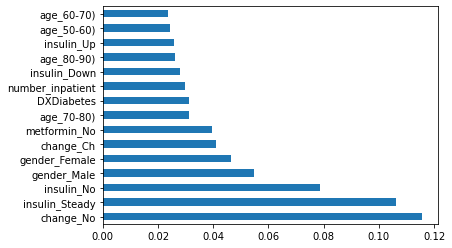

In [36]:
feat_importances = pd.Series(gb_clf_best.feature_importances_,names)
feat_importances.nlargest(15).plot(kind='barh')

# Undersampling

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,500],
'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.2,1.6],              
'random_state':[0,27,42],
'max_depth': [1,2]}

# create Ada Boost model 
gb_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gb_clf_u = RandomizedSearchCV(gb_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [14]:
gb_clf_u.fit(X_train_under, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  1.9min remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1.2, 1.6],
                                        'max_depth': [1, 2],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 500],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [15]:
print("Best parameter set found on training set:")
print()
print(gb_clf_u.best_params_)
print("Best estimator set found on training set:")
print()
print(gb_clf_u.best_estimator_)

# Save the best estimator statement for use below
gb_clf_u_best = gb_clf_u.best_estimator_
gb_clf_u_best

Best parameter set found on training set:

{'random_state': 0, 'n_estimators': 400, 'max_depth': 1, 'learning_rate': 0.4}
Best estimator set found on training set:

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=400,
                           random_state=0)


GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=400,
                           random_state=0)

### first run

GradientBoostingClassifier(learning_rate=0.6, max_depth=1, n_estimators=500,
                           random_state=0)
                           
### second run 

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=400,
                           random_state=0)

In [16]:
y_pred_gbu = gb_clf_u_best.predict(X_test)

y_pred_class_gbu = gb_clf_u_best.predict_proba(X_test)

In [17]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test,y_pred_gbu))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_test,y_pred_gbu))

confusion matrix: 
[[17572  8963]
 [ 1420  1893]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.93      0.66      0.77     26535
           1       0.17      0.57      0.27      3313

    accuracy                           0.65     29848
   macro avg       0.55      0.62      0.52     29848
weighted avg       0.84      0.65      0.72     29848



In [18]:
# limit to probability for class = 1 
base_probs_test_gbu = y_pred_class_gbu[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",metrics.roc_auc_score(y_test, base_probs_test_gbu))

ROC AUC score (test):  0.6627749793810076


In [19]:
y_pred_train_gbu = gb_clf_u_best.predict(X_train_under)

# limit to probability for class = 1 
y_pred_train_class_gbu = gb_clf_u_best.predict_proba(X_train_under)

base_probs_train_gbu = y_pred_train_class_gbu[:,1]

print("confusion matrix: ")
print(metrics.confusion_matrix(y_train_under,y_pred_train_gbu))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_train_under,y_pred_train_gbu))

# calculate roc_auc_score
print("ROC AUC score (train): ",metrics.roc_auc_score(y_train_under, base_probs_train_gbu))

confusion matrix: 
[[5348 2508]
 [3160 4696]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      7856
           1       0.65      0.60      0.62      7856

    accuracy                           0.64     15712
   macro avg       0.64      0.64      0.64     15712
weighted avg       0.64      0.64      0.64     15712

ROC AUC score (train):  0.6948967618767137


### Undersampling feature importance

<AxesSubplot:>

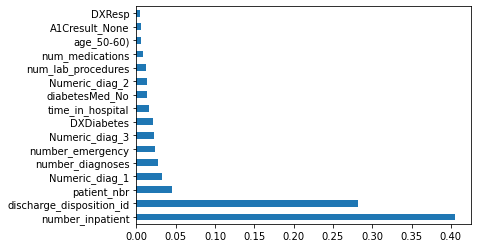

In [20]:
feat_importances = pd.Series(gb_clf_u_best.feature_importances_,namesu)
feat_importances.nlargest(16).plot(kind='barh')

In [21]:
gb15names = ['number_inpatient', 'discharge_disposition_id', 'Numeric_diag_1', 'Numeric_diag_3', 'DXDiabetes',
             'number_emergency', 'number_diagnoses', 'num_lab_procedures', 'Numeric_diag_2', 'diabetesMed_Yes',
             'time_in_hospital', 'num_medications', 'number_outpatient', 'age_50-60)', 'A1Cresult_None']       

gb15names

['number_inpatient',
 'discharge_disposition_id',
 'Numeric_diag_1',
 'Numeric_diag_3',
 'DXDiabetes',
 'number_emergency',
 'number_diagnoses',
 'num_lab_procedures',
 'Numeric_diag_2',
 'diabetesMed_Yes',
 'time_in_hospital',
 'num_medications',
 'number_outpatient',
 'age_50-60)',
 'A1Cresult_None']

# Gradient boost top 15

In [22]:
X_train_gb15 = X_train_under[gb15names]
print(X_train_gb15.info())

X_test_gb15 = X_test[gb15names]
X_test_gb15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15712 entries, 0 to 15711
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_inpatient          15712 non-null  int64  
 1   discharge_disposition_id  15712 non-null  int64  
 2   Numeric_diag_1            15712 non-null  float64
 3   Numeric_diag_3            15712 non-null  float64
 4   DXDiabetes                15712 non-null  int32  
 5   number_emergency          15712 non-null  int64  
 6   number_diagnoses          15712 non-null  int64  
 7   num_lab_procedures        15712 non-null  int64  
 8   Numeric_diag_2            15712 non-null  float64
 9   diabetesMed_Yes           15712 non-null  uint8  
 10  time_in_hospital          15712 non-null  int64  
 11  num_medications           15712 non-null  int64  
 12  number_outpatient         15712 non-null  int64  
 13  age_50-60)                15712 non-null  uint8  
 14  A1Cres

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

#create a dictionary of parameters 
param_grid = {'n_estimators':[100,200,300,400,500,500],
'learning_rate':[0.1,0.2,0.4,0.6,0.8,1.2,1.6],              
'random_state':[0,27,42],
'max_depth': [1,2]}

# create Ada Boost model 
gb_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gb_clf_u15 = RandomizedSearchCV(gb_obj, param_grid, cv = 5, scoring = 'roc_auc', refit = True, n_jobs=-1, verbose = 5)

In [24]:
gb_clf_u15.fit(X_train_gb15, y_train_under.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:   36.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   40.5s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1.2, 1.6],
                                        'max_depth': [1, 2],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 500],
                                        'random_state': [0, 27, 42]},
                   scoring='roc_auc', verbose=5)

In [25]:
print("Best parameter set found on training set:")
print()
print(gb_clf_u15.best_params_)
print("Best estimator set found on training set:")
print()
print(gb_clf_u15.best_estimator_)

# Save the best estimator statement for use below
gb_clf_u15_best = gb_clf_u15.best_estimator_
gb_clf_u15_best

Best parameter set found on training set:

{'random_state': 27, 'n_estimators': 300, 'max_depth': 1, 'learning_rate': 0.4}
Best estimator set found on training set:

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=300,
                           random_state=27)


GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=300,
                           random_state=27)

### Top 15 parameters

GradientBoostingClassifier(learning_rate=0.4, max_depth=1, n_estimators=300,
                           random_state=27)

In [26]:
y_pred_gbu15 = gb_clf_u15_best.predict(X_test_gb15)

y_pred_class_gbu15 = gb_clf_u15_best.predict_proba(X_test_gb15)

In [27]:
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test,y_pred_gbu15))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_test,y_pred_gbu15))

confusion matrix: 
[[17645  8890]
 [ 1433  1880]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     26535
           1       0.17      0.57      0.27      3313

    accuracy                           0.65     29848
   macro avg       0.55      0.62      0.52     29848
weighted avg       0.84      0.65      0.72     29848



In [28]:
# limit to probability for class = 1 
base_probs_test_gbu15 = y_pred_class_gbu15[:,1]

# calculate roc_auc_score
print("ROC AUC score (test): ",metrics.roc_auc_score(y_test, base_probs_test_gbu15))

ROC AUC score (test):  0.6631479498087002


In [29]:
y_pred_train_gbu15 = gb_clf_u15_best.predict(X_train_gb15)

# limit to probability for class = 1 
y_pred_train_class_gbu15 = gb_clf_u15_best.predict_proba(X_train_gb15)

base_probs_train_gbu15 = y_pred_train_class_gbu15[:,1]

print("confusion matrix: ")
print(metrics.confusion_matrix(y_train_under,y_pred_train_gbu15))
print(" ")
print(" ")
print("classification report: ") 
print(metrics.classification_report(y_train_under,y_pred_train_gbu15))

# calculate roc_auc_score
print("ROC AUC score (train): ",metrics.roc_auc_score(y_train_under, base_probs_train_gbu15))

confusion matrix: 
[[5332 2524]
 [3231 4625]]
 
 
classification report: 
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      7856
           1       0.65      0.59      0.62      7856

    accuracy                           0.63     15712
   macro avg       0.63      0.63      0.63     15712
weighted avg       0.63      0.63      0.63     15712

ROC AUC score (train):  0.6864905169320685
